# 1) Importing the Libraries
---

**Access Token:**    
****
**Access token secret:**    
***
**API key:**  
****  
**API Secret key:**  
****

In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt

# 2) Connecting with the Twitter API
---

In [1]:
consumer_key = "***" # API key
consumer_secret = "***"

access_token = "***-***"
access_token_secret = "***"

In [68]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [69]:
type(api)

tweepy.api.API

In [70]:
search_term = "Money Heist"
no_of_tweets = 1000

In [71]:
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)

In [72]:
print(tweets)

## 3) Understanding the working of TextBlob (BONUS)
---

In [73]:
a = "I am a bad Cricket player"
b = "I am a good Cricket player"
c = "I am a Cricket player"

In [74]:
TextBlob(a).sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [75]:
TextBlob(a).sentiment.polarity

-0.6999999999999998

In [76]:
TextBlob(b).sentiment.polarity

0.7

In [77]:
TextBlob(c).sentiment.polarity

0.0

As we can see, If polarity score is close to 1 it means it is positive, but if its close to -1 it means negative

# 4) Iterate the data and convert the result in percentage
---

In [78]:
positive = 0
negative = 0
neutral  = 0
polarity = 0

In [79]:
for tweet in tweets:
  analysis = TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity
  if (analysis.sentiment.polarity == 0):
    neutral += 1

  elif (analysis.sentiment.polarity < 0.00):
    negative += 1
  
  elif (analysis.sentiment.polarity > 0.00):
    positive += 1
    

In [80]:
positive

206

In [81]:
negative

42

In [82]:
neutral

752

In [83]:
polarity

65.06545604858105

So when we see this scores, it can be complicated, we need normalization 

In [54]:
# Define a function to calculate the percentage
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [91]:
positive_n = percentage(positive, no_of_tweets)
negative_n = percentage(negative, no_of_tweets)
neutral_n = percentage(neutral,   no_of_tweets)
polarity_n = percentage(polarity, no_of_tweets)

In [92]:
# Lets add more detail
positive_n = format(positive_n, '.2f')
negative_n = format(negative_n, '.2f')
neutral_n  = format(neutral_n,  '.2f')

In [93]:
positive_n

'20.60'

In [94]:
negative_n

'4.20'

In [95]:
neutral_n

'75.20'

In [96]:
print("Reaction of the people on " + search_term
      + " By analyzing " + str(no_of_tweets) + " Tweets")

if (polarity == 0):
  print(" is 'Neutral' and its score is : ", neutral_n)
elif (polarity < 0):
  print(" is 'Negative' and its score is :", negative_n)
elif (polarity > 0):
  print(" is 'Positive' and its score is :", positive_n)

Reaction of the people on Money Heist By analyzing 1000 Tweets
 is 'Positive' and its score is : 20.60


# 5) Getting the result of analysis
---

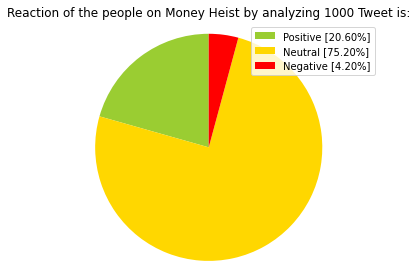

In [99]:
labels = ['Positive ['+str(positive_n)+'%]',
          'Neutral ['+str(neutral_n)+'%]',
          'Negative ['+str(negative_n)+'%]']

sizes  = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = 'best')
plt.title('Reaction of the people on '
          + search_term + ' by analyzing '
          + str(no_of_tweets) + ' Tweet is:')
plt.axis('equal')
plt.tight_layout()
plt.show()